In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

<h3>Task1</h3>

Part1

In [253]:
#points for task1

#P->S->R->Q

x1,y1 = 422,856
x2,y2 = 680,3158
x3,y3 = 2390,2280
x4,y4 = 2541,877

Img1 = np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

x1,y1 = 521,1437
x2,y2 = 465,2674
x3,y3 = 1934,2801
x4,y4 = 1856,824

Img2 = np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

x1,y1 = 1206,548
x2,y2 = 249,1785
x3,y3 = 1783,3167
x4,y4 = 2955,2293

Img3 = np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

x1,y1 = 1,162
x2,y2 = 1,655
x3,y3 = 780,655
x4,y4 = 780,162

Img4 = np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

image1 = cv.imread('D:\Purdue_fall24\Computer_Vision\HW2\HW2_images\img1.jpg') 
image2 = cv.imread('D:\Purdue_fall24\Computer_Vision\HW2\HW2_images\img2.jpg') 
image3 = cv.imread('D:\Purdue_fall24\Computer_Vision\HW2\HW2_images\img3.jpg') 
image4 = cv.imread('D:\Purdue_fall24\Computer_Vision\HW2\HW2_images/alex_honnold.jpg') 

In [255]:
#function for getting homography
def find_H(img_d,img_r):
    b = img_r.flatten()
    A = np.zeros((8,8))

    #print(img_r)
    for i,pt in enumerate(img_d):
        # print(img_r[i])
        # print(-pt[0]*img_r[i][0],-pt[1]*img_r[i][0])
        A[2*i,:] =  np.array([pt[0],pt[1],1,0,0,0,-pt[0]*img_r[i][0],-pt[1]*img_r[i][0]])
        A[2*i+1,:] =  np.array([0,0,0,pt[0],pt[1],1,-pt[0]*img_r[i][1],-pt[1]*img_r[i][1]])

    x = np.linalg.inv(A)@b

    H = np.array([[x[0],x[1],x[2]],[x[3],x[4],x[5]],[x[6],x[7],1]])
    return H

H = find_H(Img4,Img1)
#print(H)

[[ 6.08146867e+00  1.06594043e+00  2.92190484e+02]
 [ 1.08129825e+00  7.44906781e+00 -2.52529613e+02]
 [ 1.19864696e-03  7.08684002e-04  1.00000000e+00]]


In [277]:
#function for transforming pixel coordinates
def transform(img_d,image_d,img_r,H):
    image_r = np.copy(img_r)
    #print(img_r.shape,img_r.shape[0:2])
    for j in range(img_r.shape[0]):
        for i in range(img_r.shape[1]):
            x = np.array([i,j,1])
            x_d = np.linalg.inv(H)@x
            xi = int(x_d[0]/x_d[2])
            xj = int(x_d[1]/x_d[2])
            if min(img_d[:,0])< xi <max(img_d[:,0]) and min(img_d[:,1])< xj < max(img_d[:,1]):
                #print(image_d[i,j],img_r[xi,xj])
                image_r[j,i] = image_d[xj,xi]
    return image_r

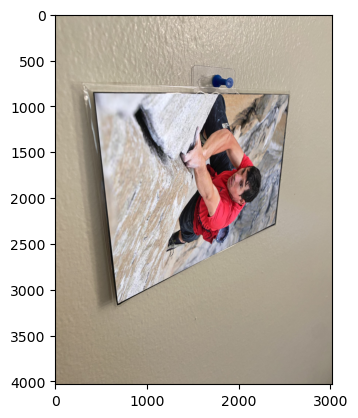

In [278]:
#image4->image1
tf = transform(Img4,image4,image1,H)
plt.imshow(tf[:,:,::-1])

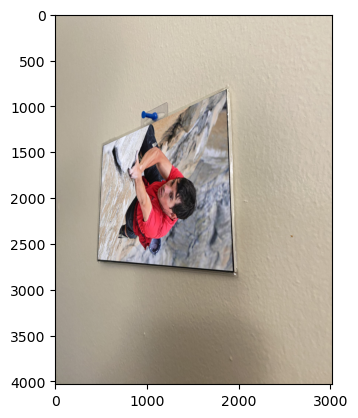

In [281]:
#image4->image2
H = find_H(Img4,Img2)
tf = transform(Img4,image4,image2,H)
plt.imshow(tf[:,:,::-1])

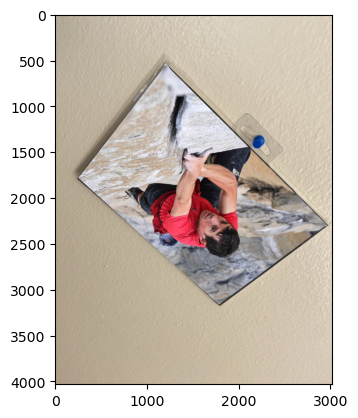

In [282]:
#image4->image3
H = find_H(Img4,Img3)
tf = transform(Img4,image4,image3,H)
plt.imshow(tf[:,:,::-1])

Part2

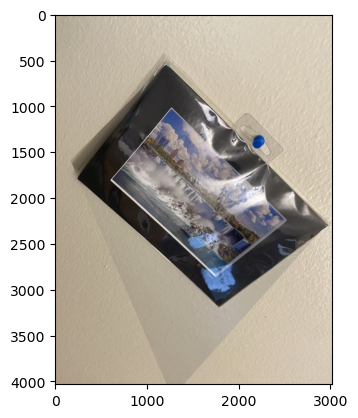

In [288]:
H_12 = find_H(Img1,Img2)
H_23 = find_H(Img2,Img3)

tf = transform(Img1,image1,image3,H_23@H_12)
plt.imshow(tf[:,:,::-1])
#result image

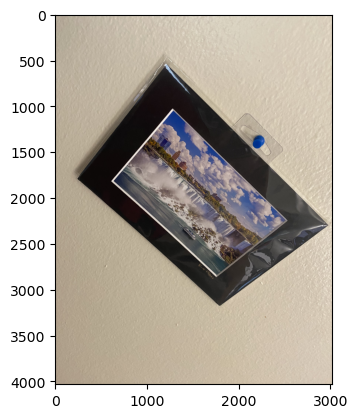

In [289]:
#plt.imshow(image1[:,:,::-1])
plt.imshow(image3[:,:,::-1])
#image3

Part3

In [307]:
#Affine homography function
def find_H_affine(img_d,img_r):
    b = img_r.flatten()
    A = np.zeros((8,6))

    #print(img_r)
    for i,pt in enumerate(img_d):
        # print(img_r[i])
        # print(-pt[0]*img_r[i][0],-pt[1]*img_r[i][0])
        A[2*i,:] =  np.array([pt[0],pt[1],1,0,0,0])
        A[2*i+1,:] =  np.array([0,0,0,pt[0],pt[1],1])

    x = np.linalg.pinv(A)@b

    H = np.array([[x[0],x[1],x[2]],[x[3],x[4],x[5]],[0,0,1]])
    return H


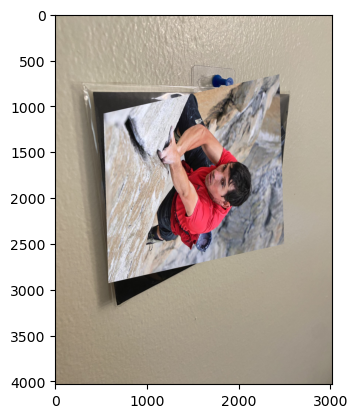

In [308]:
#image4->image1
H = find_H_affine(Img4,Img1)
tf = transform(Img4,image4,image1,H)
plt.imshow(tf[:,:,::-1])

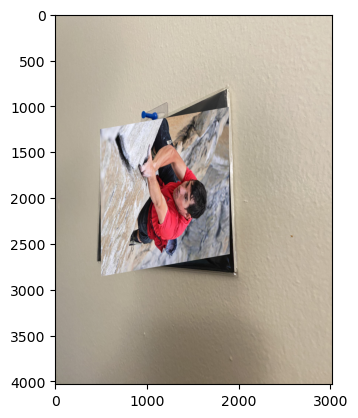

In [309]:
#image4->image2
H = find_H_affine(Img4,Img2)
tf = transform(Img4,image4,image2,H)
plt.imshow(tf[:,:,::-1])

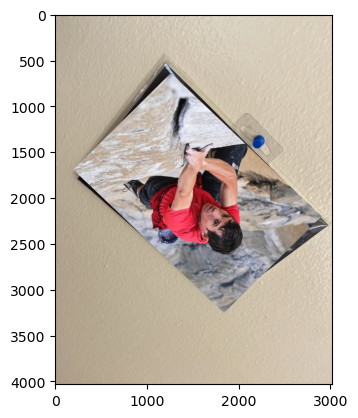

In [310]:
#image4->image3
H = find_H_affine(Img4,Img3)
tf = transform(Img4,image4,image3,H)
plt.imshow(tf[:,:,::-1])

<h3>Task2</h3>

Part1

In [313]:
#points for task 2

#P->S->R->Q

x1,y1 = 873,263
x2,y2 = 912,1292
x3,y3 = 2836,1297
x4,y4 = 2855,278

Img1 = np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

x1,y1 = 327,175
x2,y2 = 331,1677
x3,y3 = 2665,1482
x4,y4 = 2694,414

Img2 = np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

x1,y1 = 2055,760
x2,y2 = 2089,1482
x3,y3 = 3446,1575
x4,y4 = 3412,629

Img3 = np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

x1,y1 = 8,8
x2,y2 = 8,3679
x3,y3 = 5562,3679
x4,y4 = 5553,17

Img4 = np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

image1 = cv.imread('D:\Purdue_fall24\Computer_Vision\HW2\HW2_images\img1_s.jpg') 
image2 = cv.imread('D:\Purdue_fall24\Computer_Vision\HW2\HW2_images\img2_s.jpg') 
image3 = cv.imread('D:\Purdue_fall24\Computer_Vision\HW2\HW2_images\img3_s.jpg') 
image4 = cv.imread('D:\Purdue_fall24\Computer_Vision\HW2\HW2_images/chicago.jpg') 

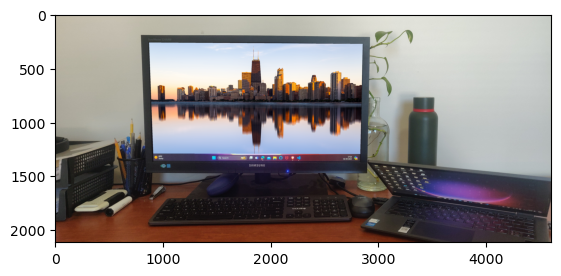

In [314]:
#image4->image1
H = find_H(Img4,Img1)
tf = transform(Img4,image4,image1,H)
plt.imshow(tf[:,:,::-1])

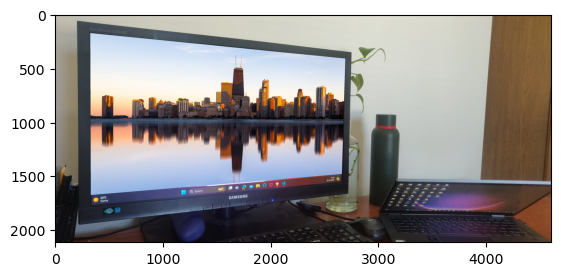

In [315]:
#image4->image2
H = find_H(Img4,Img2)
tf = transform(Img4,image4,image2,H)
plt.imshow(tf[:,:,::-1])

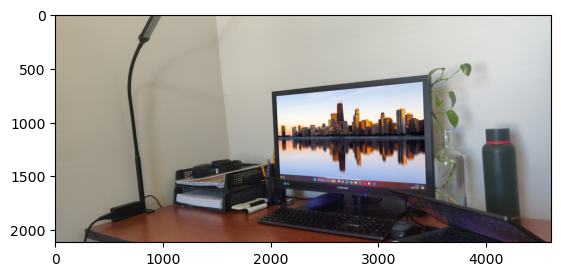

In [316]:
#image4->image3
H = find_H(Img4,Img3)
tf = transform(Img4,image4,image3,H)
plt.imshow(tf[:,:,::-1])

Part2

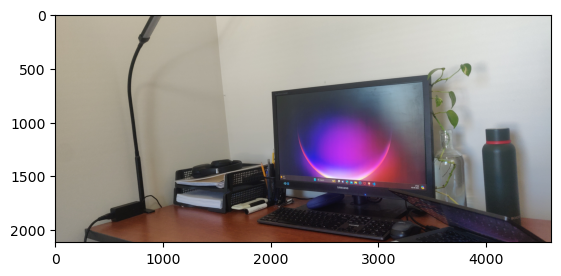

In [317]:
H_12 = find_H(Img1,Img2)
H_23 = find_H(Img2,Img3)

tf = transform(Img1,image1,image3,H_23@H_12)
plt.imshow(tf[:,:,::-1])
#result image

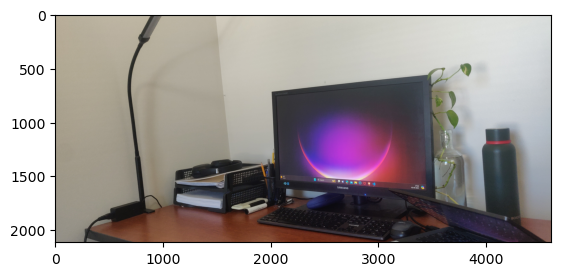

In [318]:
#plt.imshow(image1[:,:,::-1])
plt.imshow(image3[:,:,::-1])
#image3

Part3

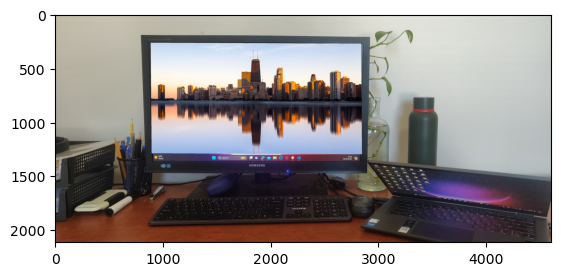

In [319]:
#image4->image1
H = find_H_affine(Img4,Img1)
tf = transform(Img4,image4,image1,H)
plt.imshow(tf[:,:,::-1])

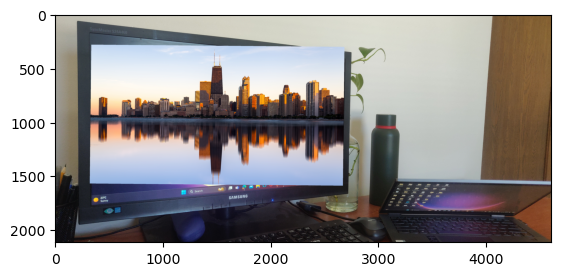

In [320]:
#image4->image2
H = find_H_affine(Img4,Img2)
tf = transform(Img4,image4,image2,H)
plt.imshow(tf[:,:,::-1])

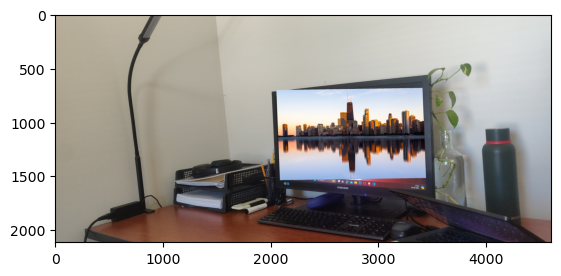

In [321]:
#image4->image3
H = find_H_affine(Img4,Img3)
tf = transform(Img4,image4,image3,H)
plt.imshow(tf[:,:,::-1])

<h3>Extra</h3>

Text(0.5, 0.8, 'alpha=45°')

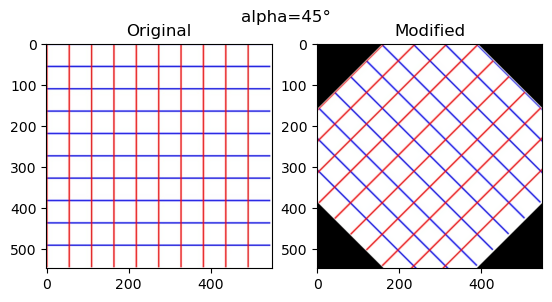

In [3]:
#Extra

img_hv = cv.imread('D:\Purdue_fall24\Computer_Vision\HW2\HW2_images\hv_lines.jpg')
H,W = img_hv.shape[0:2]
H_n = np.array([[2/W,0,-1],[0,2/H,-1],[0,0,1]])
H_dn = np.array([[W/2,0,W/2],[0,H/2,H/2],[0,0,1]])

#rotation 
def get_H_ro(alpha):
    H_alpha = np.array([[np.cos(alpha),-np.sin(alpha),0],[np.sin(alpha),np.cos(alpha),0],[0,0,1]])
    return H_dn@H_alpha@H_n

#change rotation angle 
alpha = 45  #deg
alpha = np.radians(alpha)

H_rotate = get_H_ro(alpha)

result_img = cv.warpPerspective(img_hv,H_rotate,(img_hv.shape[1],img_hv.shape[0]))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_hv[:,:,::-1])
axarr[1].imshow(result_img[:,:,::-1])
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Modified')
f.suptitle('alpha=45°',y=0.8)


Text(0.5, 0.8, 'alpha=30°')

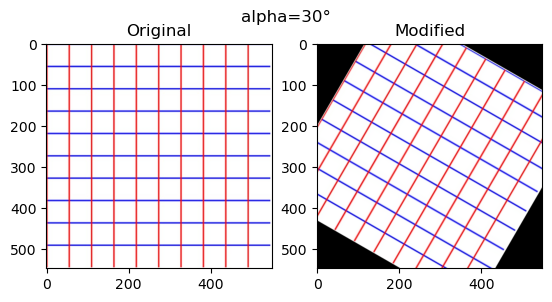

In [4]:
#change rotation angle
alpha = 30  #deg
alpha = np.radians(alpha)

H_rotate = get_H_ro(alpha)

result_img = cv.warpPerspective(img_hv,H_rotate,(img_hv.shape[1],img_hv.shape[0]))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_hv[:,:,::-1])
axarr[1].imshow(result_img[:,:,::-1])
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Modified')
f.suptitle('alpha=30°',y=0.8)

Text(0.5, 0.8, 'alpha=15°')

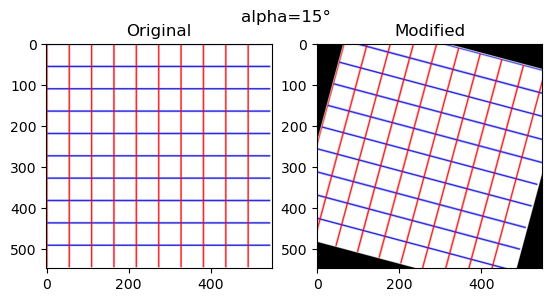

In [5]:
#change rotation angle
alpha = 15  #deg
alpha = np.radians(alpha)

H_rotate = get_H_ro(alpha)

result_img = cv.warpPerspective(img_hv,H_rotate,(img_hv.shape[1],img_hv.shape[0]))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_hv[:,:,::-1])
axarr[1].imshow(result_img[:,:,::-1])
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Modified')
f.suptitle('alpha=15°',y=0.8)

In [6]:
# lines for numerical verification 
hor_line = np.array([[ 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
 [ 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [-5.,-4.,-3.,-2.,-1., 0., 1., 2., 3., 4.]])

ver_line = np.array([[ 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [ 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
 [-5.,-4.,-3.,-2.,-1., 0., 1., 2., 3., 4.]])



Text(0.5, 0.8, 'alpha=45°')

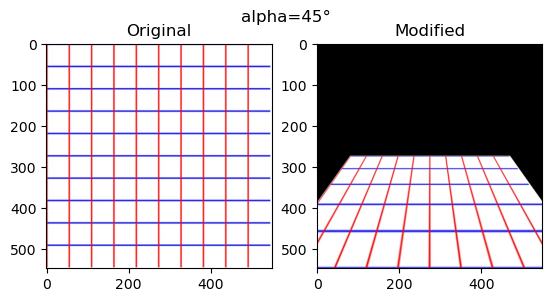

In [7]:
#vertical tilting
def get_H_ver(alpha):
    H_alpha = np.array([[1,0,0],[0,np.cos(alpha),np.sin(alpha)],[0,-np.sin(alpha),np.cos(alpha)]])
    return H_dn@H_alpha@H_n

#change rotation angle
alpha = 45  #deg
alpha = np.radians(alpha)

H_tiltV = get_H_ver(alpha)

result_img = cv.warpPerspective(img_hv,H_tiltV,(img_hv.shape[1],img_hv.shape[0]))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_hv[:,:,::-1])
axarr[1].imshow(result_img[:,:,::-1])
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Modified')
f.suptitle('alpha=45°',y=0.8)

Text(0.5, 0.8, 'alpha=30°')

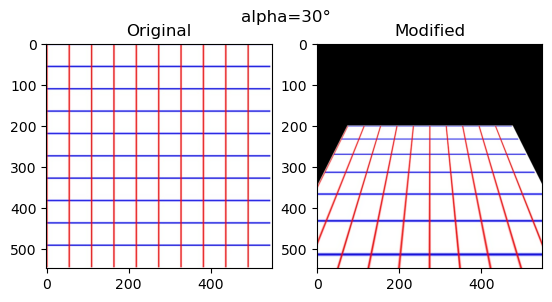

In [8]:
#change rotation angle
alpha = 30  #deg
alpha = np.radians(alpha)

H_tiltV = get_H_ver(alpha)

result_img = cv.warpPerspective(img_hv,H_tiltV,(img_hv.shape[1],img_hv.shape[0]))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_hv[:,:,::-1])
axarr[1].imshow(result_img[:,:,::-1])
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Modified')
f.suptitle('alpha=30°',y=0.8)

Text(0.5, 0.8, 'alpha=15°')

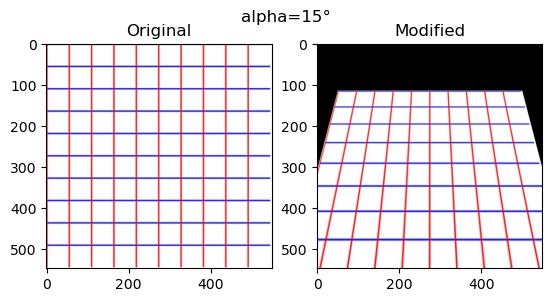

In [9]:
#change rotation angle
alpha = 15  #deg
alpha = np.radians(alpha)

H_tiltV = get_H_ver(alpha)

result_img = cv.warpPerspective(img_hv,H_tiltV,(img_hv.shape[1],img_hv.shape[0]))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_hv[:,:,::-1])
axarr[1].imshow(result_img[:,:,::-1])
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Modified')
f.suptitle('alpha=15°',y=0.8)

In [14]:
#testing lines on V_tilt transform

alpha = 30  #deg
alpha = np.radians(alpha)
H_tiltV = get_H_ver(alpha)

tilt_line = hor_line   #

result_line = np.transpose(np.linalg.inv(H_tiltV))@tilt_line

print(result_line)
print(tilt_line)

[[   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   1.35688464    1.35871279    1.36054094    1.3623691     1.36419725
     1.3660254     1.36785356    1.36968171    1.37150986    1.37333802]
 [-275.33012702 -274.96410162 -274.59807621 -274.23205081 -273.8660254
  -273.5        -273.1339746  -272.76794919 -272.40192379 -272.03589838]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]]


Text(0.5, 0.8, 'alpha=45°')

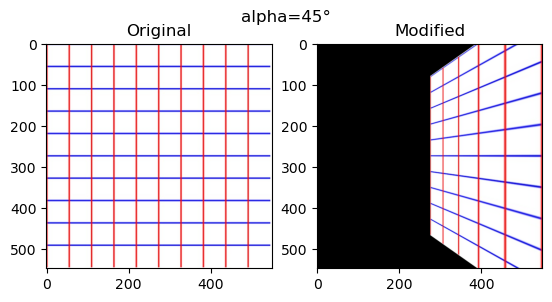

In [10]:
#horizontal tilting
def get_H_hor(alpha):
    H_alpha = np.array([[np.cos(alpha),0,np.sin(alpha)],[0,1,0],[-np.sin(alpha),0,np.cos(alpha)]])
    return H_dn@H_alpha@H_n

#change rotation angle
alpha = 45  #deg
alpha = np.radians(alpha)

H_tiltH = get_H_hor(alpha)

result_img = cv.warpPerspective(img_hv,H_tiltH,(img_hv.shape[1],img_hv.shape[0]))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_hv[:,:,::-1])
axarr[1].imshow(result_img[:,:,::-1])
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Modified')
f.suptitle('alpha=45°',y=0.8)

Text(0.5, 0.8, 'alpha=30°')

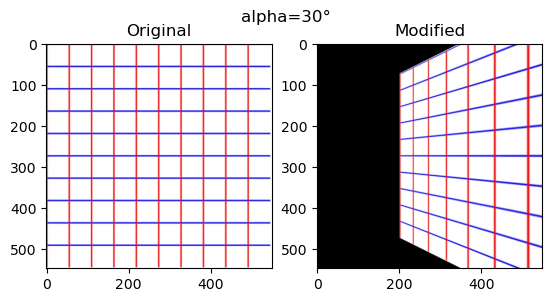

In [11]:
#change rotation angle
alpha = 30  #deg
alpha = np.radians(alpha)

H_tiltH = get_H_hor(alpha)

result_img = cv.warpPerspective(img_hv,H_tiltH,(img_hv.shape[1],img_hv.shape[0]))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_hv[:,:,::-1])
axarr[1].imshow(result_img[:,:,::-1])
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Modified')
f.suptitle('alpha=30°',y=0.8)

Text(0.5, 0.8, 'alpha=15°')

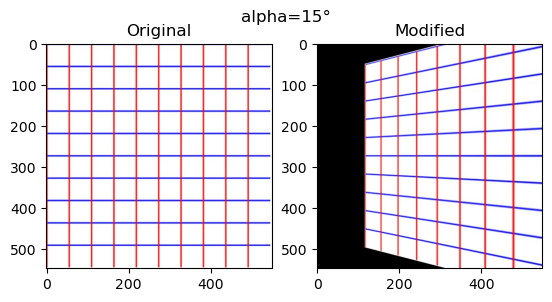

In [12]:
#change rotation angle
alpha = 15  #deg
alpha = np.radians(alpha)

H_tiltH = get_H_hor(alpha)

result_img = cv.warpPerspective(img_hv,H_tiltH,(img_hv.shape[1],img_hv.shape[0]))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_hv[:,:,::-1])
axarr[1].imshow(result_img[:,:,::-1])
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Modified')
f.suptitle('alpha=15°',y=0.8)

In [16]:
#testing lines on H_tilt transform

alpha = 30  #deg
alpha = np.radians(alpha)
H_tiltH = get_H_hor(alpha)

tilt_line = ver_line   #

result_line = np.transpose(np.linalg.inv(H_tiltH))@tilt_line

print(result_line)
print(tilt_line)

[[ 1.35691794e+00  1.35873943e+00  1.36056092e+00  1.36238242e+00
   1.36420391e+00  1.36602540e+00  1.36784690e+00  1.36966839e+00
   1.37148988e+00  1.37331138e+00]
 [-1.09613564e-19 -8.76908514e-20 -6.57681385e-20 -4.38454257e-20
  -2.19227128e-20  0.00000000e+00  2.19227128e-20  4.38454257e-20
   6.57681385e-20  8.76908514e-20]
 [-2.76330127e+02 -2.75964102e+02 -2.75598076e+02 -2.75232051e+02
  -2.74866025e+02 -2.74500000e+02 -2.74133975e+02 -2.73767949e+02
  -2.73401924e+02 -2.73035898e+02]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]]
